https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://www.geeksforgeeks.org/python-image-classification-using-keras/

https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/

https://github.com/hasabo/Machine-Learning/blob/master/Python/Image_Classification%20/Image_Classification.ipynb  

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import os

# Define a function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder_name in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder_name)
        if os.path.isdir(subfolder_path):
            label = subfolder_name  # Assuming folder names are class labels
            for filename in os.listdir(subfolder_path):
                img = cv2.imread(os.path.join(subfolder_path, filename))
                if img is not None:
                    # Resize the image to a common size if needed
                    img = cv2.resize(img, (224, 224))  # Adjust the size as needed
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess your images
X, y = load_images_from_folder('Dataset')  # Replace with your folder path

# Flatten and normalize image data
X = X.reshape(X.shape[0], -1) / 255.0  # Flatten and normalize pixel values

# Define machine learning models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    
}

results = []

for model_name, model in models.items():
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    precision_scores = cross_val_score(model, X, y, cv=kfold, scoring='precision_macro')
    recall_scores = cross_val_score(model, X, y, cv=kfold, scoring='recall_macro')
    f1_scores = cross_val_score(model, X, y, cv=kfold, scoring='f1_macro')

    results.append({
        'Model': model_name,
        'Precision': precision_scores.mean(),
        'Recall': recall_scores.mean(),
        'F1 Score': f1_scores.mean()
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


# Final Code 

In [3]:
import cv2
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import os

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Define your machine learning algorithms here (replace with actual algorithms)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Add more algorithms as needed

# Create a list of classifiers
classifiers = [
    LogisticRegression()
    # Add more classifiers as needed
]

# Create a list to store results for each classifier
results = []

# Define the number of folds for cross-validation
n_splits = 5

# Create StratifiedKFold cross-validator
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)




# Define a function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder_name in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder_name)
        if os.path.isdir(subfolder_path):
            label = subfolder_name  # Assuming folder names are class labels
            for filename in os.listdir(subfolder_path):
                img = cv2.imread(os.path.join(subfolder_path, filename))
                if img is not None:
                    # Resize the image to a common size if needed
                    img = cv2.resize(img, (224, 224))  # Adjust the size as needed
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess your images
X, y = load_images_from_folder('Dataset')  # Replace with your folder path













# Make Data 1D for compatibility
X_flat = X.reshape(X.shape[0], -1)

# Perform cross-validation for each classifier
for clf in classifiers:
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for train_index, val_index in kf.split(X_flat, y):
        X_train, X_val = X_flat[train_index], X_flat[val_index]
        y_train, y_val = y[train_index], y[val_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    results.append({
        'Classifier': clf.__class__.__name__,
        'Precision': avg_precision,
        'Recall': avg_recall,
        'F1 Score': avg_f1
    })

# Print the results for each classifier
for result in results:
    print(f"Classifier: {result['Classifier']}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
    print()


C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Classifier: LogisticRegression
Precision: 0.9912
Recall: 0.9909
F1 Score: 0.9909



C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Importing Libraries

In [1]:
import os
import cv2 
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Loading Dataset

In [2]:
class_names = ['Benign cases','Malignant cases', 'Normal cases']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [3]:
def load_data():
  
    datasets = ['train', 'test']
    output = []    
    for dataset in datasets:        
        images = []
        labels = []        
        print("Loading {}".format(dataset))
        
        
        for folder in os.listdir(dataset):
            label = class_names_label[folder]            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):                
                img_path = os.path.join(os.path.join(dataset, folder), file)                
                image = cv2.imread(img_path)
                image = cv2.resize(image, IMAGE_SIZE)                 
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
        
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|███████████████████████████████████████████████████████████████████████████████| 332/332 [00:01<00:00, 214.46it/s]


Loading test


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 214.92it/s]


# Shuffle Data 

In [5]:
from sklearn.utils import shuffle 
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Exploratory Data Analysis

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 876
Number of testing examples: 221
Each image is of size: (224, 224)


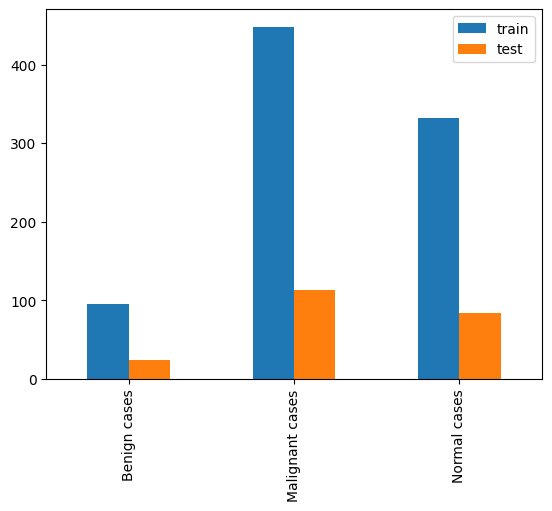

In [7]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=class_names).plot.bar()

plt.show()

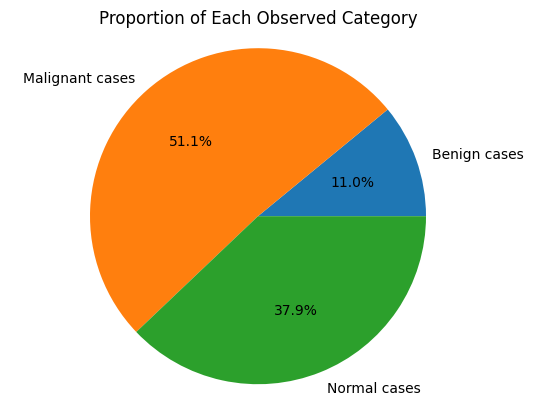

In [8]:
plt.pie(train_counts,
        explode=None, 
        labels=class_names,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Proportion of Each Observed Category')
plt.show()

# Data Preprocessing

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Transfer Learning Feature Extraction -- VGG16

In [10]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

In [11]:
model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [12]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

### Make Data 1D for compatability with Standard Classifiers

In [13]:
X_trainShape = train_features.shape[1]*train_features.shape[2]*train_features.shape[3]
X_testShape = test_features.shape[1]*test_features.shape[2]*test_features.shape[3]

X_trainFlat = train_features.reshape(train_features.shape[0], X_trainShape)
X_testFlat = test_features.reshape(test_features.shape[0], X_testShape)

# Machine Learning Models

# Decision Tree

In [14]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_trainFlat, train_labels)

DecisionTreeClassifier()

In [15]:
y_pred1 = tree.predict(X_testFlat)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred1)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred1)* 100}")

Accuracy is: 96.83257918552036


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.99      0.97      0.98       113
           2       0.96      0.96      0.96        84

    accuracy                           0.97       221
   macro avg       0.95      0.97      0.96       221
weighted avg       0.97      0.97      0.97       221

Confusion Matrix : 


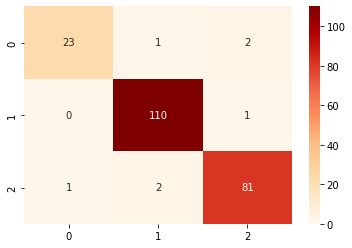

In [17]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred1))

cm = confusion_matrix(y_pred1, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [18]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred1))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred1)))

MAE: 0.04524886877828054
MSE: 0.07239819004524888
RMSE: 0.269069117598525


In [19]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred1,average='weighted'))

Precision Score :  0.9692884670260236
Recall Score :  0.9683257918552036
f1_score :  0.96860698125404


# Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_trainFlat, train_labels)

RandomForestClassifier()

In [21]:
y_pred3 = RandomForestClassifier.predict(X_testFlat)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred3)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred3)* 100}")

Accuracy is: 98.64253393665159


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       1.00      1.00      1.00       113
           2       0.97      1.00      0.98        84

    accuracy                           0.99       221
   macro avg       0.99      0.96      0.97       221
weighted avg       0.99      0.99      0.99       221

Confusion Matrix : 


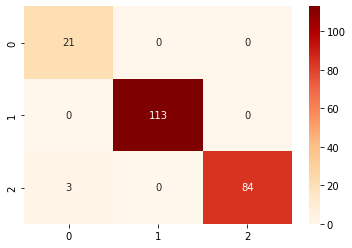

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred3))

cm = confusion_matrix(y_pred3, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred3))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred3)))

MAE: 0.027149321266968326
MSE: 0.05429864253393665
RMSE: 0.2330206912141852


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred3,average='weighted'))

Precision Score :  0.9868934311124982
Recall Score :  0.9864253393665159
f1_score :  0.9860919266492022


# ExtraTreesClassifier

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_trainFlat, train_labels)

ExtraTreesClassifier()

In [27]:
y_pred5 = extratree.predict(X_testFlat)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred5)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred5)* 100}")

Accuracy is: 99.09502262443439


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       1.00      1.00      1.00       113
           2       0.98      1.00      0.99        84

    accuracy                           0.99       221
   macro avg       0.99      0.97      0.98       221
weighted avg       0.99      0.99      0.99       221

Confusion Matrix : 


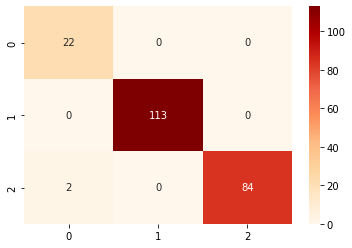

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred5))

cm = confusion_matrix(y_pred5, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred5))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred5)))

MAE: 0.01809954751131222
MSE: 0.03619909502262444
RMSE: 0.19026059766179765


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred5,average='weighted'))

Precision Score :  0.9911606860991266
Recall Score :  0.9909502262443439
f1_score :  0.990806725995533


# KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_trainFlat, train_labels)

KNeighborsClassifier()

In [33]:
y_pred2 = KNeighborsClassifier.predict(X_testFlat)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred2)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred2)* 100}")

Accuracy is: 96.83257918552036


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.75      0.84        24
           1       1.00      1.00      1.00       113
           2       0.93      0.99      0.96        84

    accuracy                           0.97       221
   macro avg       0.96      0.91      0.93       221
weighted avg       0.97      0.97      0.97       221

Confusion Matrix : 


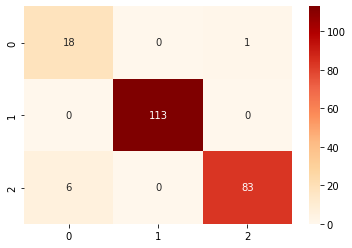

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred2))

cm = confusion_matrix(y_pred2, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred2))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred2)))

MAE: 0.06334841628959276
MSE: 0.12669683257918551
RMSE: 0.355944985326645


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred2,average='weighted'))

Precision Score :  0.9686602749183193
Recall Score :  0.9683257918552036
f1_score :  0.9669419878967337


# XGBoost

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_trainFlat, train_labels)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
y_pred4 = xgb.predict(X_testFlat)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred4)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred4)* 100}")

Accuracy is: 99.5475113122172


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00       113
           2       0.99      1.00      0.99        84

    accuracy                           1.00       221
   macro avg       1.00      0.99      0.99       221
weighted avg       1.00      1.00      1.00       221

Confusion Matrix : 


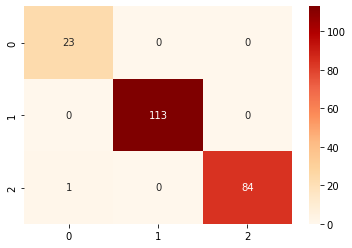

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred4))

cm = confusion_matrix(y_pred4, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred4))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred4)))

MAE: 0.00904977375565611
MSE: 0.01809954751131222
RMSE: 0.1345345587992625


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred4,average='weighted'))

Precision Score :  0.9955283470854405
Recall Score :  0.995475113122172
f1_score :  0.9954403632670105


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
classifier6 = LogisticRegression()
classifier6.fit(X_trainFlat, train_labels)

C:\Users\nafem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred6 = classifier6.predict(X_testFlat)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred6)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred6)* 100}")

Accuracy is: 100.0


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00        84

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

Confusion Matrix : 


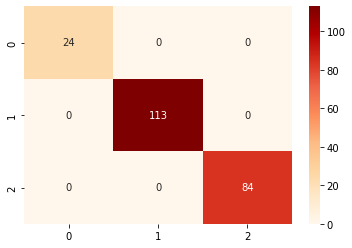

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred6))

cm = confusion_matrix(y_pred6, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Logistic Regression

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred6))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred6)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred6, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred6,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred6,average='weighted'))

Precision Score :  1.0
Recall Score :  1.0
f1_score :  1.0


# Support Vector Machine

In [50]:
from sklearn import svm
classifier7 = svm.SVC()
classifier7.fit(X_trainFlat, train_labels)

SVC()

In [51]:
y_pred7 = classifier7.predict(X_testFlat)

In [52]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred7)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred7)* 100}")

Accuracy is: 96.83257918552036


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       1.00      1.00      1.00       113
           2       0.92      1.00      0.96        84

    accuracy                           0.97       221
   macro avg       0.97      0.90      0.93       221
weighted avg       0.97      0.97      0.97       221

Confusion Matrix : 


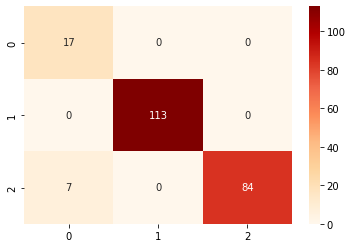

In [53]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred7))

cm = confusion_matrix(y_pred7, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Support Vector Machine

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred7))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred7)))

MAE: 0.06334841628959276
MSE: 0.12669683257918551
RMSE: 0.355944985326645


In [55]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred7, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred7,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred7,average='weighted'))

Precision Score :  0.9707622694048034
Recall Score :  0.9683257918552036
f1_score :  0.9662553802008609
